In [1]:
import numpy as np
import matplotlib.pyplot as plt 

In [2]:
# funkcja przystosowania
def fx(x):
    return 10/(1+(x-3)**2)

Text(0.5, 1.0, 'f(x)')

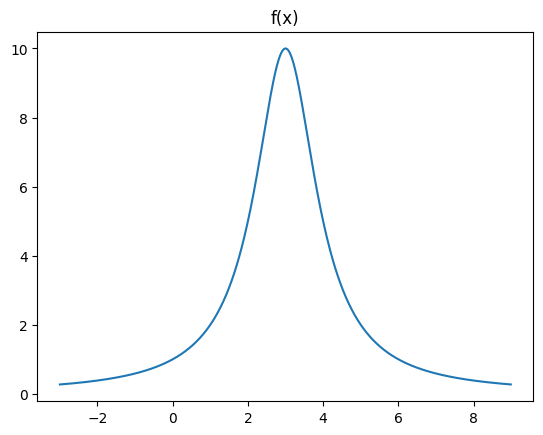

In [3]:
xs = np.arange(-3,9,step=0.01)
plt.plot(xs,[fx(x) for x in xs])
plt.title('f(x)')

In [4]:
k = 20 # liczba osobników
r = 8 # liczba bitów w każdym zakodowanym osobniku

In [5]:
# kodowanie oraz dekodowoanie z zmiennych optymalizacyjnych do postaci osobników i vice versa
# użyte kodowanie to kodowanie logarytmiczne
def dekodowanie(c): # brak potrzeby implementacji
    return False

def kodowanie(c):
    znak_liczby = c[0]
    znak_wykladnika = c[1]
    s = 0
    for i in range(2,r):
        s += c[i] * 2**(r-1-i)

    x = (-1)**(znak_liczby) * (np.e**(-1)**(znak_wykladnika)) * s
    return x
    

In [6]:
# Wybór populacji początkowej - losowy
# prawdopodobienstwo wylosowania 0, lub 1 to 50%
def wybor_populacji_poczatkowej():
    S0 = []
    for i in range(k):
        S0.append([])
        for _ in range(r):
            S0[i].append(int(np.random.random()<0.5))
    return S0

In [7]:
# ocena populacji
# polega na zakodowaniu wartości ci do wartości xi, oraz podanie tej wartości do funkcji
# przystosowania, jest to wykonywane dla każdego osobnika
def ocena(c):
    Fxi = []
    for osobniki in c:
        xi = kodowanie(osobniki)
        fxi = float(fx(xi))
        Fxi.append(fxi)
    return Fxi

In [8]:
# warunek stopu
# procedura zatrzymania jesli skrajne wartosci ocen beda wystarczaja blisko siebie
def stop(Fxi, e):
    faSn = max(Fxi) - min(Fxi)
    if faSn <= e:
        return True
    else:
        return False

In [9]:
# selekcja
# metoda (koła) ruletki
# Polega na wybraniu takich użytkowników do zbioru S', z prawdopodobieństwem proporcjonalnym
# do ich oceny, czyli im wyższa ocena danego osobnika to ma większe prawdopodobieństwo trafienia
# do zbioru S', przy czym dany osobnik może zostać dodany dowolną ilość razy
def selekcja(Fxi, c):
    Sp = []
    p = []
    suma = sum(Fxi) # zeby nie liczyc za kazdym razem
    for i in range(k):
        p.append(Fxi[i]/suma)
    for i in range(k):
        d = np.random.random()
        s = 0
        for l in range(len(p)):
            if d < p[l]+s:
                Sp.append(c[l][:])
                break
            else:
                s += p[l]
    return Sp

In [10]:
# krzyżowanie
# metoda krzyżowania jednopunktowego - wybieramy 2 losowe osobniki (rodziców), oraz wybieramy
# losową liczbę 0 <= d <= 1. Kiedy d będzie mniejsze od 0.5 to osobniki zostają poddane krzyżowaniu.
# W przeciwnym przypadku trafiają do zbioru S'' nie zmienione. Polega to na wybraniu miejsca pk w kodzie
# genetycznym osobnika, gdzie 1 <= pk < r. Następnie zachodzi wymiana genów miejsc od 0 do pk
# pomiędzy tymi 2 osobnikami i tak zmienione trafiają do zbioru S'' w ich oryginalne miejsca.
def krzyzowanie(c, Sp):
    Spp = Sp.copy()
    pc = 0.5
    indeksy = np.arange(k)
    for _ in range(k//2):
        idx1 = np.random.randint(0,indeksy.shape[0])
        ci = Sp[indeksy[idx1]][:]
        idx1_prawdziwy = indeksy[idx1]
        indeksy = np.delete(indeksy, idx1)
        idx2 = np.random.randint(0,indeksy.shape[0])
        cj = Sp[indeksy[idx2]][:]
        idx2_prawdziwy = indeksy[idx2]
        indeksy = np.delete(indeksy, idx2)
        d = np.random.random()
        if d <= pc: # poddanie krzyżowaniu
            pk = np.random.randint(1,r-1) # punkt krzyżowania
            temp = ci[:pk]
            ci[:pk] = cj[:pk]
            cj[:pk] = temp
            Spp[idx1_prawdziwy] = ci
            Spp[idx2_prawdziwy] = cj
        else:
            pass
    return Spp


In [11]:
# mutacja
# polega na losowym odwróceniu wartości pojedynczego chromosomu, z bardzo małym prawdopodobnieństwem (0.01)
def mutacja(Spp):
    pm = 0.01
    Snp1 = Spp
    for osobniki in Snp1:
        for i in range(len(osobniki)):
            if np.random.random() <= pm:
                osobniki[i] = int(not osobniki[i])
    return Snp1

In [12]:
# parametry
e = 0.1

# algorytm genetyczny - maksymalizacja funkcji f(x)
S0 = wybor_populacji_poczatkowej()
print("POPULACJA POCZATKOWA")
print([kodowanie(ci) for ci in S0])
print("Oceny")
print(ocena(S0))
print()
Sn = S0.copy()
n = 0
while True:
    n += 1
    Fxi = ocena(Sn)
    if stop(Fxi, e):
        print(f"Warunek stopu został spełniony przy {n} iteracji")
        print(Sn)
        print([kodowanie(ci) for ci in Sn])
        print("Oceny")
        print(ocena(Sn))
        break
    else:
        Sp = selekcja(Fxi, Sn)
        Spp = krzyzowanie(Sn, Sp)
        Snp1 = mutacja(Spp)
        Sn = Snp1

POPULACJA POCZATKOWA
[-111.44955496682086, 46.21079108380377, 5.150312176400193, 5.886071058743077, 154.94206422216558, -84.2667366822304, -1.103638323514327, 19.865489823257885, -6.25395049991452, 51.64735474072186, 9.932744911628943, -15.81881597037202, -89.70330033914848, -108.7312731383618, 108.7312731383618, 18.393972058572118, 7.357588823428847, 20.60124870560077, -111.44955496682086, 81.54845485377135]
Oceny
[0.0007633762236896519, 0.005352824849698982, 1.7781436941526891, 1.0718795851165845, 0.00043313686037267163, 0.0013129418873774985, 0.5605429085357735, 0.0350330496737296, 0.11542599135634753, 0.004223748652873332, 0.20381977827219783, 0.02815728839604506, 0.0011634804124114617, 0.0008009690189114251, 0.0008944462128476527, 0.04202133094750244, 0.5002856542517207, 0.03217462264256191, 0.0007633762236896519, 0.0016205197312955653]

Warunek stopu został spełniony przy 52 iteracji
[[0, 1, 0, 0, 0, 1, 1, 1], [0, 1, 0, 0, 0, 1, 1, 1], [0, 1, 0, 0, 0, 1, 1, 1], [0, 1, 0, 0, 0, 1,